### CS 457 - Homework Assignment 12: Time Series Analysis
### Shahzaib Amir (sa05578)
### Email Address: sa05578@st.habib.edu.pk

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
from sklearn.metrics import mean_squared_error
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
df = pd.read_csv('btc-market-price.csv', parse_dates=['Date'])
df

,Date,Market_Price
0,2021-03-25,52508.23
1,2021-03-26,51415.92
2,2021-03-27,55074.47
3,2021-03-28,55863.93
4,2021-03-29,55783.71
...,...,...
361,2022-03-21,41250.83
362,2022-03-22,41071.41
363,2022-03-23,42372.67
364,2022-03-24,42905.06


In [4]:
btc_market_price = df
btc_market_price = df.sort_values('Date')

In [5]:
btc_market_price.isnull().sum()

Date            0
Market_Price    0
dtype: int64

In [6]:
btc_market_price = btc_market_price.groupby('Date')['Market_Price'].sum().reset_index()
btc_market_price

,Date,Market_Price
0,2021-03-25,52508.23
1,2021-03-26,51415.92
2,2021-03-27,55074.47
3,2021-03-28,55863.93
4,2021-03-29,55783.71
...,...,...
361,2022-03-21,41250.83
362,2022-03-22,41071.41
363,2022-03-23,42372.67
364,2022-03-24,42905.06


In [7]:
btc_market_price = btc_market_price.set_index('Date')
btc_market_price.index

DatetimeIndex(['2021-03-25', '2021-03-26', '2021-03-27', '2021-03-28',
               '2021-03-29', '2021-03-30', '2021-03-31', '2021-04-01',
               '2021-04-02', '2021-04-03',
               ...
               '2022-03-16', '2022-03-17', '2022-03-18', '2022-03-19',
               '2022-03-20', '2022-03-21', '2022-03-22', '2022-03-23',
               '2022-03-24', '2022-03-25'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

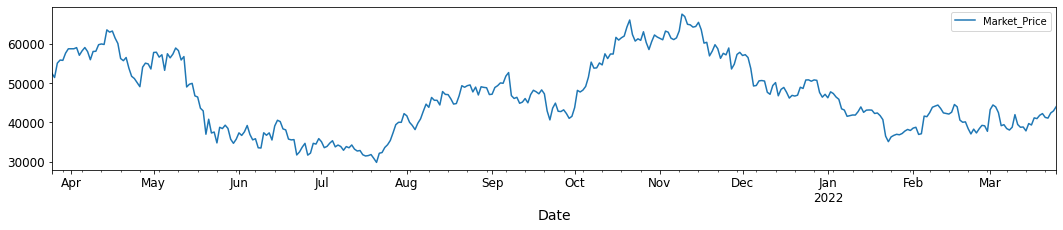

In [30]:
btc_market_price.plot(figsize=(18, 3))
plt.show()

### 1. Read the dataset visualize the trend, seasonality, residual etc. Discuss your observations in the visualization.


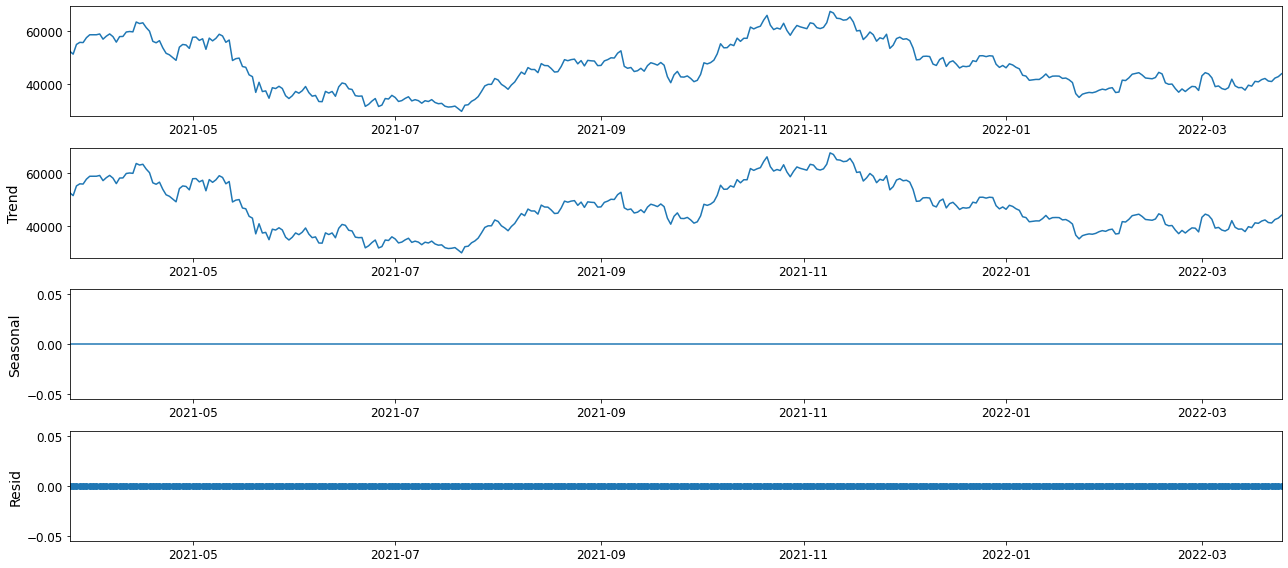

In [36]:
decomposition = sm.tsa.seasonal_decompose(btc_market_price, period = 1, model='additive')
rcParams['figure.figsize'] = 18, 8
fig = decomposition.plot()
plt.show()

The first graph is the Observed graph which matches with the Trend graph. 
In the Trend graph, monthly market price trend is shown above from March 2021 to March 2022. The market price decreases from March 2021 to July 2021 then it increases till November 2021. Then it gradually decreases till Jan 2022 and then remains constant till March 2022. 
Note: The data used is for per day and the description given above is approximated to give the rough idea about the graphs.

We can see that the entire series was used as the trend component and that no seasonality was present. The residual plot also shows zero, as can be seen. This is an example of how the classical decomposition failed to distinguish the noise from the linear trend.

### 2. Split the data into train and test sets. Use all the data for year 2020 for training and 2021 for testing.


There is no data for 2020 so, I am using from March 2021 to November 2021 data for training and December 2021 till March 2022 data for testing.

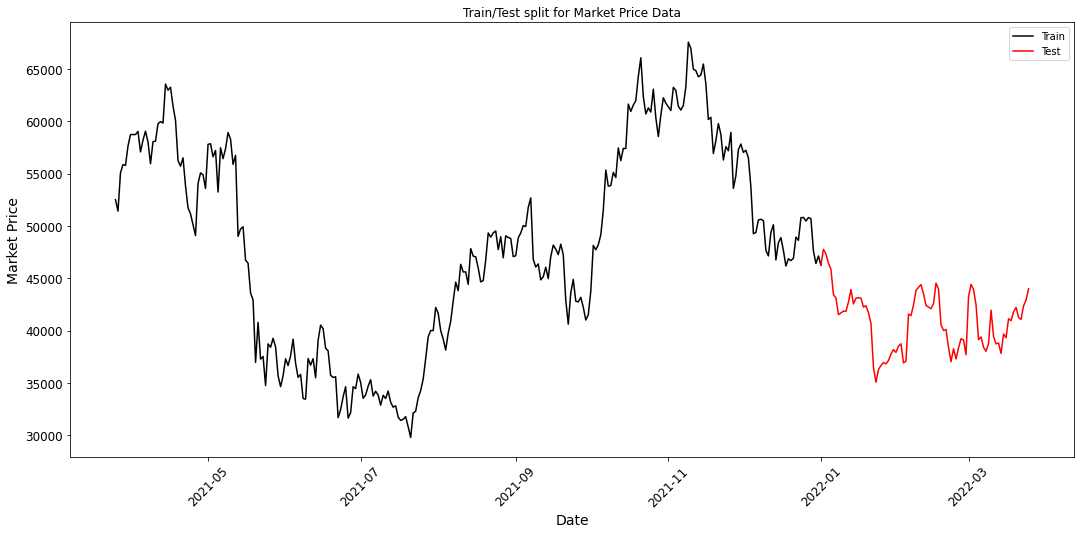

In [38]:
train = btc_market_price[btc_market_price.index <= pd.to_datetime("2022-01-01", format='%Y-%m-%d')] 
test = btc_market_price[btc_market_price.index >= pd.to_datetime("2022-01-01", format='%Y-%m-%d')]
# print(train)
# print(test)

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Market Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Market Price Data")
plt.legend()
plt.show()

### 3. Use ARIMA, visualize the results and report the RMSE

We will be plotting the training/test data using ARIMA Model to see how correct our predictions were.

C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


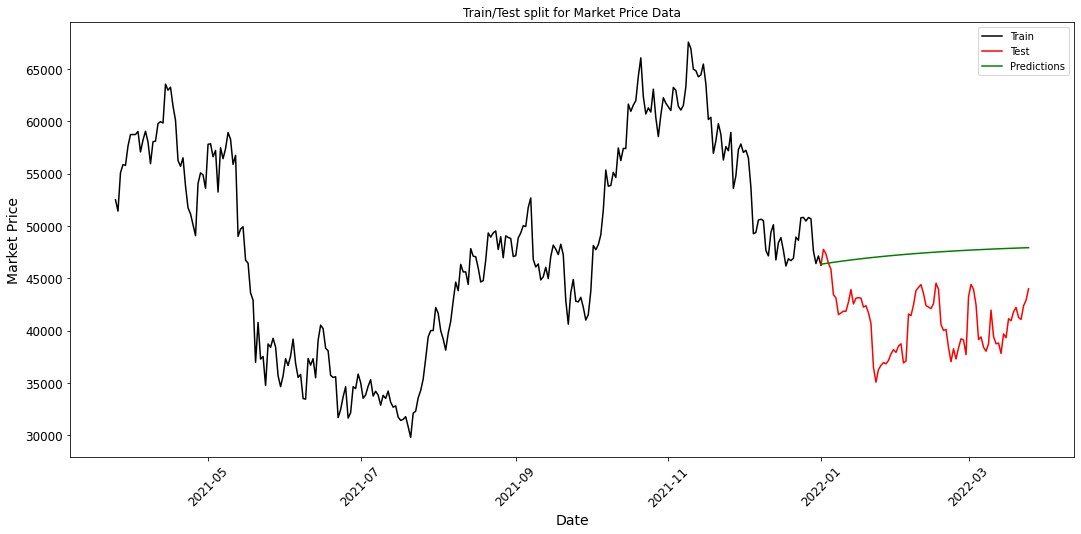

RMSE:  7045.6308372871545


In [39]:
ARIMAmodel = ARIMA(train, order = (1, 0, 1))

ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index)) #only providing dates (test.index) from test as input for forecasting

y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

#for plotting purposes
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Market Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Market Price Data")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()




arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

The prediction in the graph above is poor which is why our RMSE value is high.

C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


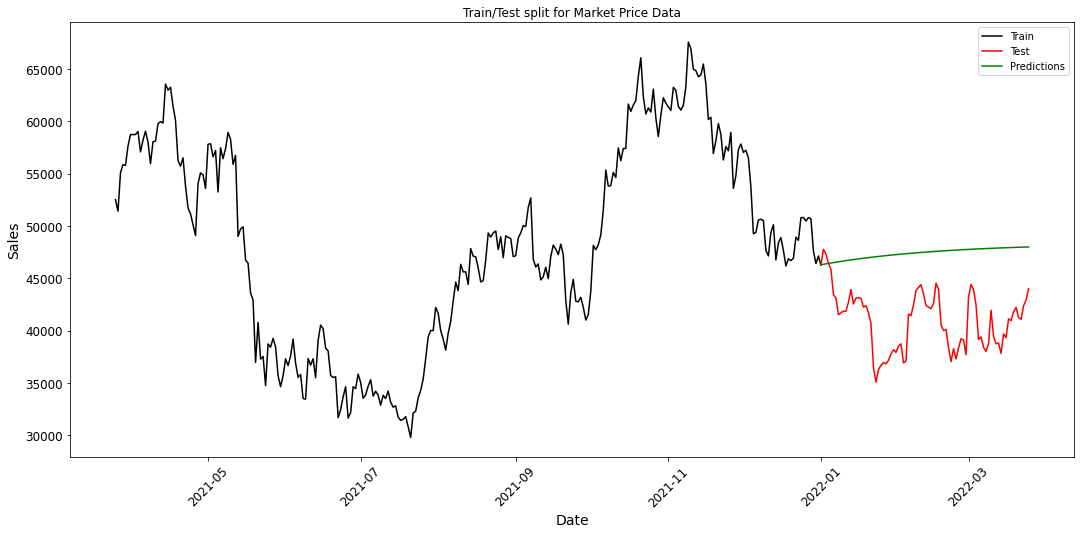

RMSE:  7099.041184401191


In [40]:
ARIMAmodel = ARIMA(train, order = (1, 0, 0))
ARIMAmodel = ARIMAmodel.fit()
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Market Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Market Price Data")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()


arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

The prediction in the graph above is still poor as the RMSE value shows.

### 4. Use SARIMAX, visualize the results and report the RMSE.

C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


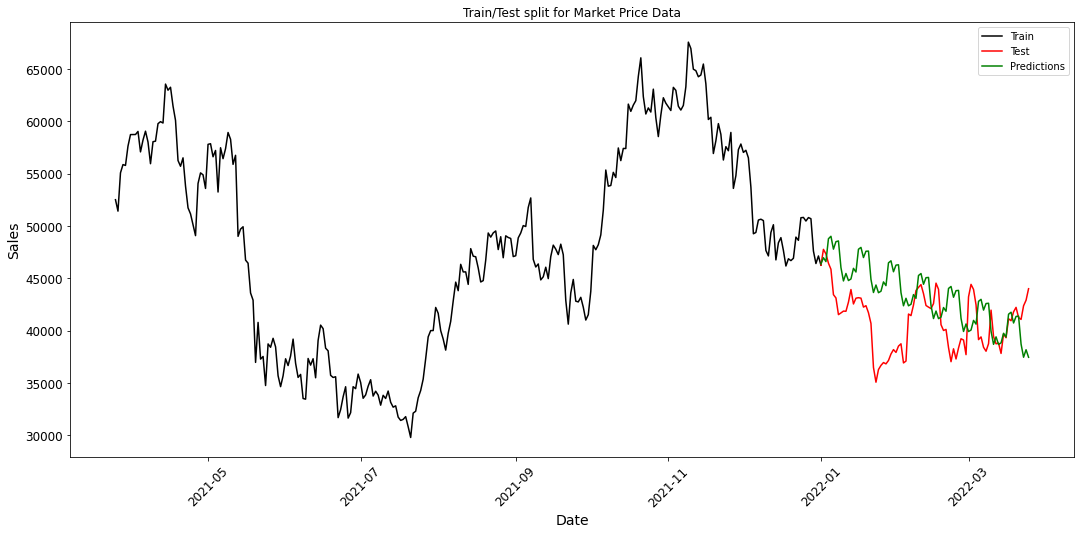

RMSE:  4341.907831104102


In [83]:
SARIMAXmodel = SARIMAX(train,order=(1, 1, 1),seasonal_order=(1, 1, 0, 12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Market Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Market Price Data")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()


arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

The RMSE value clearly shows that the prediction is on the track but still the deviation occurs as the RMSE value is greater.

C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


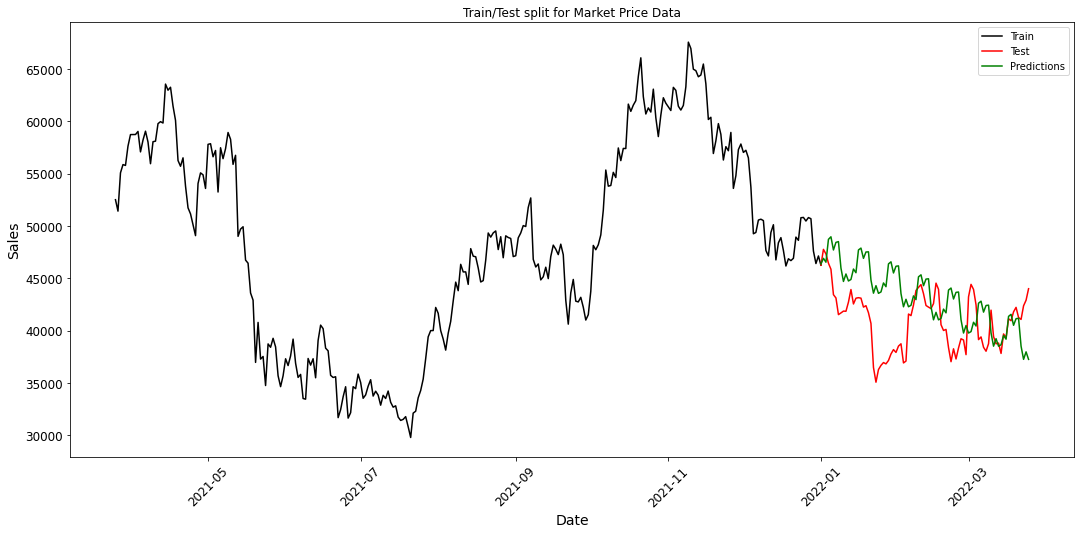

RMSE:  4293.837728109132


In [97]:
SARIMAXmodel = SARIMAX(train,order=(0, 1, 0),seasonal_order=(1, 1, 0, 12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Market Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Market Price Data")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()


arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

The RMSE value has decreased but the RMSE value is still greater.

### 5. Try to come up with optimal parameters for SARIMA. Pick the best one, visualize the results and then report the RMSE. Compare both ARIMA and SARIMA and conclude which one is better?

In [101]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
# print(seasonal_pdq)

In [102]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:6896.675317036195
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6404.677285155045
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:5491.388317635046


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:5256.17301437222
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:5509.457070600121


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:5485.0876407451315
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:5276.178777558292


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:5231.472053902521


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6669.573841282504


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6336.829071068818
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:5316.030734971031


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:5074.115722827302


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:5335.014050740161


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:6317.111323803521


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:5069.240921515713


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:5026.287040401577
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:5032.643611008863


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4821.347168449018
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:5040.072216800692


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4702.5135404605435
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:4837.785868322042


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:4822.297254044222


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:4713.982530577781


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:4684.342186232416
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:5012.532332418368


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:4804.31517652985
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:5015.427161281486


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:4683.483445877699


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:4838.7067905623135


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:4805.618121905509


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:4738.614198309351


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:4666.107193548254
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:5051.614685561414


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:5076.52293881648
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:5045.370668335476


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:4749.934156898253


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:4839.223190692679


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:4841.068727713696


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:4731.785890654253


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:4729.292206012402


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:5034.949201265032


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:5053.522486409063


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:5028.302652551248


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:4731.281659101887


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:4840.099772129959


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:4824.989566066573


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:4732.880342642761


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:4688.305535078613
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:5033.207391792401


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:4822.307107258443
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:5037.90473089302


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:4700.9749044477685


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:4821.605845524634


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:4823.222316435094


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:4696.550737671768


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:4684.229110765756
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:5014.118026434246


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:4806.293659069272


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:5016.938259646348


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:4706.978859388296
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:4823.53918562041


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:4807.617086566575


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:4698.535045027176


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:4668.037586404873


C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


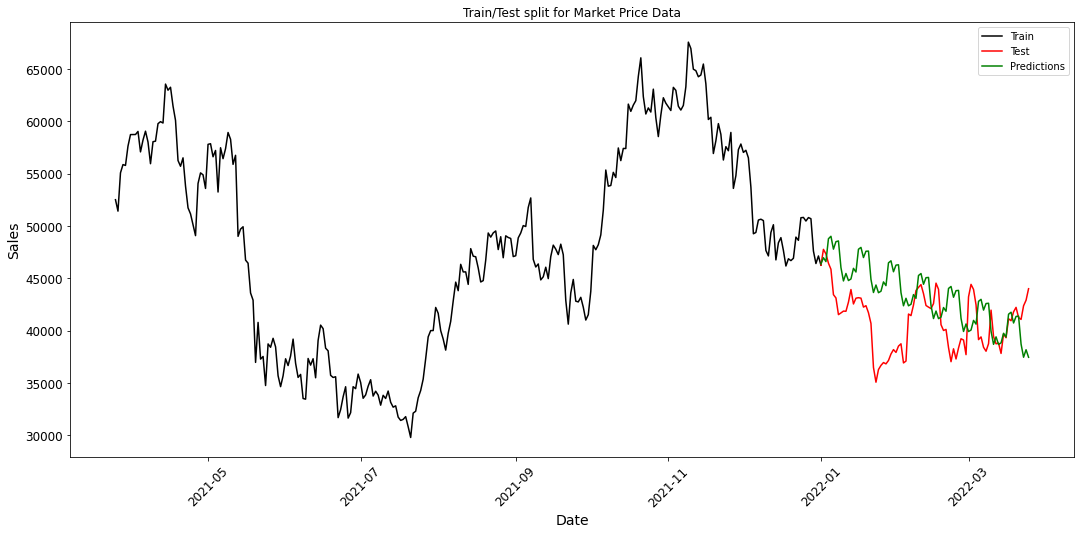

RMSE:  4341.907831104102


In [111]:
SARIMAXmodel = SARIMAX(train,order=(1, 1, 1),seasonal_order=(1, 1, 0, 12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Market Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Market Price Data")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()


arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

After comparing the ARIMA and SARIMAX models, we can conclude that the SARIMAX model is superior because the predictions are more accurate and close to the test data, as they should be.

### 6. Now use any two Machine Learning regressor techniques and use the same training and testing set (used for ARIMA and SARIMA). Visualize the results and report the RMSE.

In [112]:
# Extracting the seasonality data
months = [x.month for x in train.index]
years = [x.year for x in train.index]
day = [x.day for x in train.index]
 
# Converting into one matrix
X = np.array([day, months, years]).T ## It has the dates
Y = train.values ## It will predict the market price

In [113]:
X[:10]

array([[  25,    3, 2021],
       [  26,    3, 2021],
       [  27,    3, 2021],
       [  28,    3, 2021],
       [  29,    3, 2021],
       [  30,    3, 2021],
       [  31,    3, 2021],
       [   1,    4, 2021],
       [   2,    4, 2021],
       [   3,    4, 2021]])

In [114]:
Y[:10]

array([[52508.23],
       [51415.92],
       [55074.47],
       [55863.93],
       [55783.71],
       [57627.67],
       [58730.13],
       [58735.25],
       [58736.92],
       [59031.32]])

In [115]:
# Extracting the day, month and year data
tmonths = [x.month for x in test.index]
tyears = [x.year for x in test.index]
tday = [x.day for x in test.index]
 
# convert into one matrix
testX = np.array([tday, tmonths, tyears]).T
testY = test.values

C:\Users\SHAHZA~1\AppData\Local\Temp/ipykernel_301780/3598190712.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfmodel.fit(X,Y)


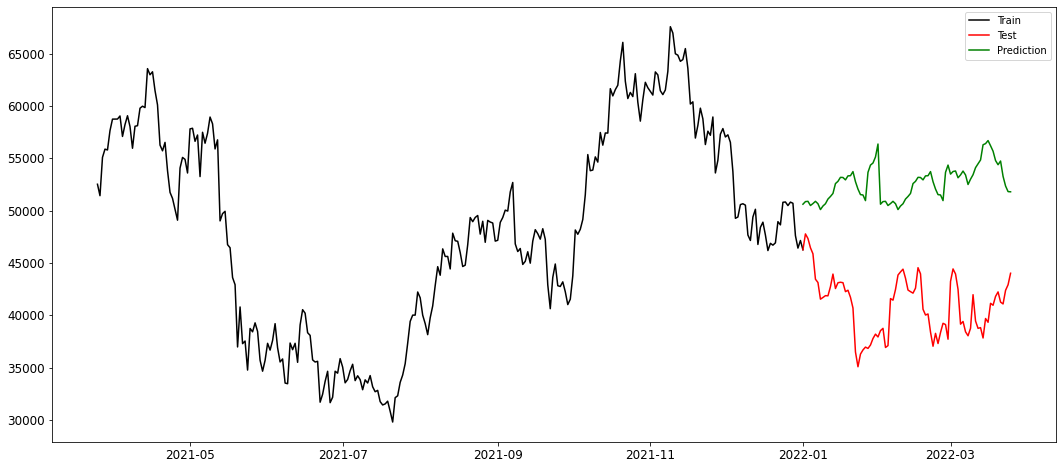

RMSE:  12250.012556238984


In [116]:
#Fitting the model using Machine Learning
rfmodel = RandomForestRegressor()
rfmodel.fit(X,Y)
 
#Predicting on the same period
preds = rfmodel.predict(testX)
 
#Plotting what has been learned by the model
plt.plot(train.index, train.values,color="black", label='Train')
plt.plot(test.index, test.values,color="red", label='Test')
plt.plot(test.index, preds, color="green",label='Prediction')
plt.legend()
plt.show()

rf_rmse = np.sqrt(mean_squared_error(test.values, preds))
print("RMSE: ",rf_rmse)

Linear Regression

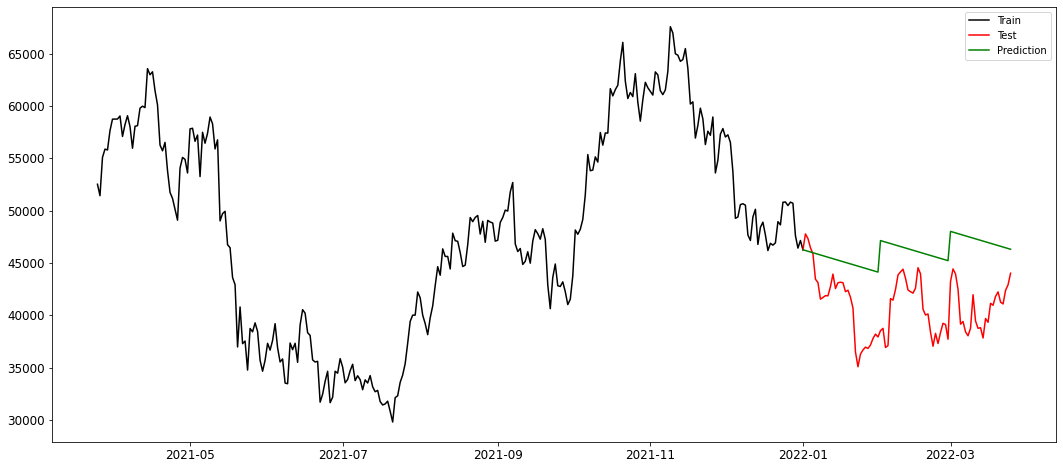

RMSE:  5837.061014310978


In [117]:
# Train the model
lr_model = LinearRegression()
lr_model.fit(X, Y)


#Predicting on the same period
preds_lr = lr_model.predict(testX)
 
#Plotting what has been learned by the model
plt.plot(train.index, train.values,color="black", label='Train')
plt.plot(test.index, test.values,color="red", label='Test')
plt.plot(test.index, preds_lr, color="green",label='Prediction')
plt.legend()
plt.show()

rf_rmse = np.sqrt(mean_squared_error(test.values, preds_lr))
print("RMSE: ",rf_rmse)


From the above two ML Regressor techniques Linear Regression performed better while SARIMAX is still the best among ARIMA, SARIMAX and ML Regressor techniques.

### 8. Generate future dates from April 1st 2022 to June 30th 2022 and predict the price using SARIMA model (with optimal parameters).
### 9. Using the same future dates, predict the price using any one ML regression model
### 10. Visualize the predictions from 9 and 10 and discuss their differences.

In [26]:
futureX = pd.date_range(start='01/04/2022', end='30/06/2022')
futureX

DatetimeIndex(['2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07',
               '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13',
               ...
               '2022-06-21', '2022-06-22', '2022-06-23', '2022-06-24',
               '2022-06-25', '2022-06-26', '2022-06-27', '2022-06-28',
               '2022-06-29', '2022-06-30'],
              dtype='datetime64[ns]', length=178, freq='D')

In [27]:
# extract the seasonality data
months = [futureX.month for x in train.index]
years = [futureX.year for x in train.index]
day = [futureX.day for x in train.index]
 
# convert into one matrix
X = np.array([day, months, years]).T
Y = train.values

In [28]:
# extract the day, month and year data
tmonths = [futureX.month for x in test.index]
tyears = [futureX.year for x in test.index]
tday = [futureX.day for x in test.index]
 
# convert into one matrix
testX = np.array([tday, tmonths, tyears]).T
testY = test.values

C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shahzaib Amir\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


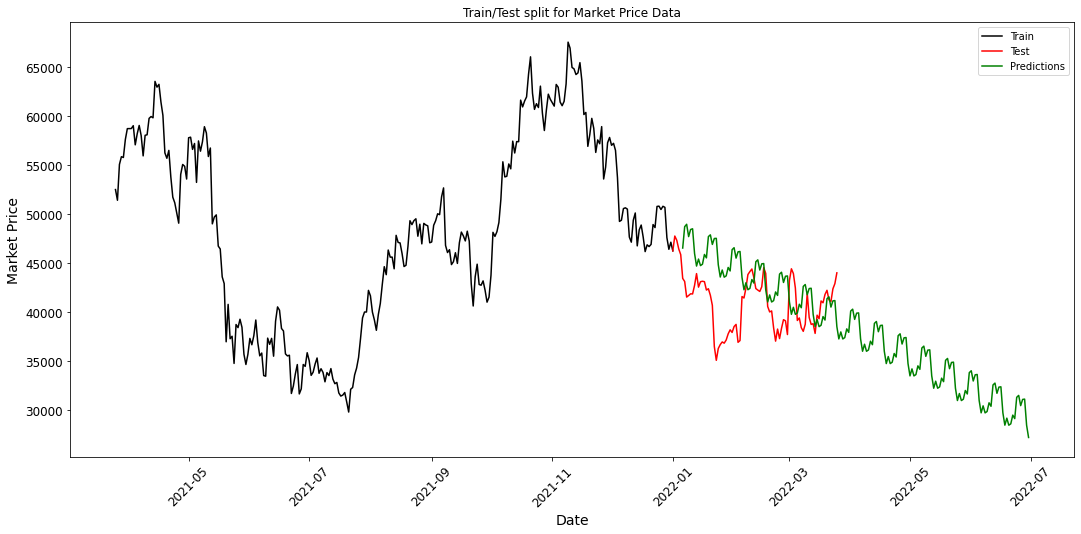

ValueError: Found input variables with inconsistent numbers of samples: [84, 178]

In [128]:
SARIMAXmodel = SARIMAX(train,order=(0, 1, 0),seasonal_order=(1, 1, 0, 12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(futureX))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = futureX[0], end = futureX[-1])
y_pred_df.index = futureX
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Market Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Market Price Data")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()


arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

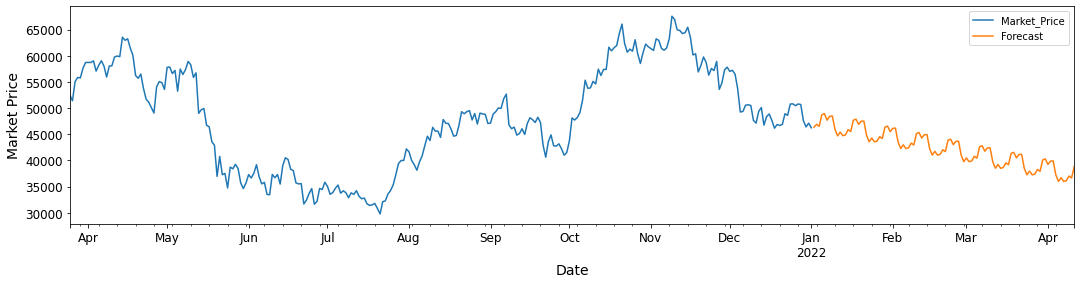

In [122]:
pred_uc = SARIMAXmodel.get_forecast(steps=100) # next 100 months forecast
pred_ci = pred_uc.conf_int()
ax = train.plot(label='observed', figsize=(18, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Market Price')
plt.legend()
plt.show()